In [2]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

In [3]:
train_data_gen = ImageDataGenerator(rescale=1.0/255)
validation_data_gen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

KeyboardInterrupt: 

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [ ]:
history = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64
        )

Epoch 1/50


448/448 [==============================] - 15s 25ms/step - loss: 1.6622 - accuracy: 0.3391 - val_loss: 1.4500 - val_accuracy: 0.4473
Epoch 2/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3916 - accuracy: 0.4639 - val_loss: 1.3064 - val_accuracy: 0.5073
Epoch 3/50
448/448 [==============================] - 11s 24ms/step - loss: 1.2512 - accuracy: 0.5220 - val_loss: 1.2028 - val_accuracy: 0.5382
Epoch 4/50
448/448 [==============================] - 11s 24ms/step - loss: 1.1554 - accuracy: 0.5637 - val_loss: 1.1840 - val_accuracy: 0.5512
Epoch 5/50
448/448 [==============================] - 11s 24ms/step - loss: 1.0547 - accuracy: 0.6060 - val_loss: 1.1277 - val_accuracy: 0.5732
Epoch 6/50
448/448 [==============================] - 11s 24ms/step - loss: 0.9589 - accuracy: 0.6439 - val_loss: 1.1327 - val_accuracy: 0.5792
Epoch 7/50
448/448 [==============================] - 11s 24ms/step - loss: 0.8702 - accuracy: 0.6791 - val_loss: 1.1353 - val_accuracy: 0.5841
Epo

In [ ]:
import matplotlib.pyplot as plt

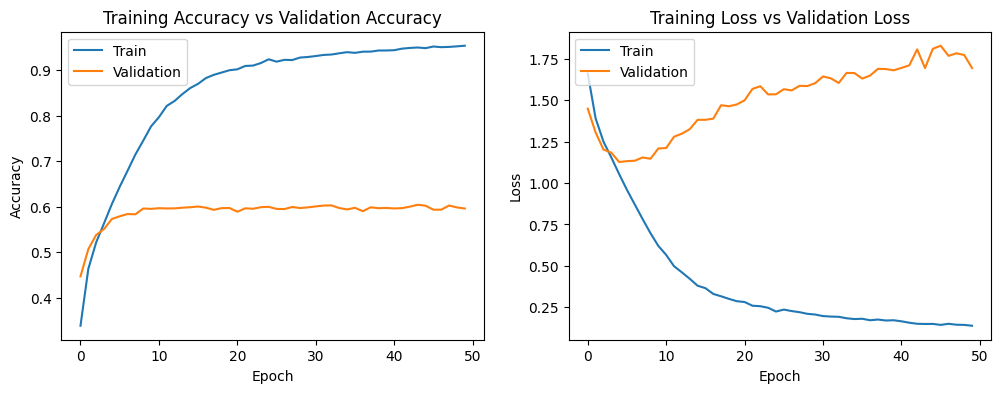

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('model.h5')

In [ ]:
scores = emotion_model.evaluate(train_generator)

449/449 [==============================] - 9s 19ms/step - loss: 0.0948 - accuracy: 0.9894


In [ ]:
scores = emotion_model.evaluate(validation_generator)

113/113 [==============================] - 2s 21ms/step - loss: 1.7713 - accuracy: 0.6002


In [5]:
import tkinter as tk
import cv2
import numpy as np
from keras.models import model_from_json
import threading
from tkinter import filedialog
from customtkinter import *
import customtkinter

In [6]:
json_file = open('model8624.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
emotion_model.load_weights("model8624.h5")

NameError: name 'history' is not defined

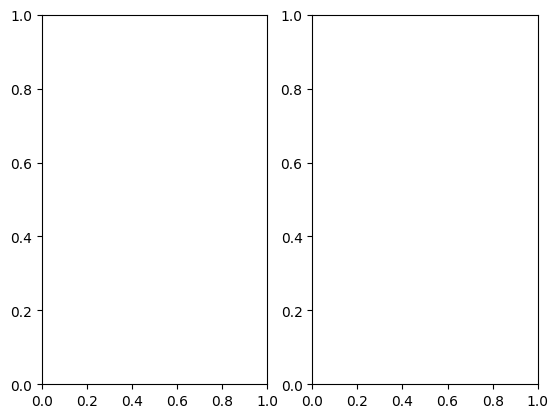

In [7]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()